<a href="https://colab.research.google.com/github/varghese-babu/Flutter/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Iris Classification Problem**

In this case, we will try to classify Iris Dataset into three classes (Iris Setosa, Iris Virginica, and Iris Versicolor) based on four attributes: Sepal Length, Sepal Width, Petal Length, and Petal Width.

Iris dataset description can be found in http://archive.ics.uci.edu/ml/datasets/iris

Iris data can be downloaded from http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Image for post

**Data Preparation**

First, we must import necessary libraries

In [ ]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 

By using pandas, we can download dataset from a given URL and convert it into a dataset.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Let’s analyze our dataset. Use dataset.head(n) to display top n data. Change dataset.head(n) to dataset.sample(n) to display random data.
Image for post

In [ ]:
dataset.head(6)
  #change head with sample and tail

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Now that our dataset is ready we can separate input features (x) and target class (y). Input feature will be 150x4 matrix (150 data x sepal_length, sepal_width, petal_length, and petal_width) and target output 150x1 (iris_class).

In [ ]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In this session, we will use a Multi-Layer Perceptron (MLP) Classifier. We need to encode our target attribute for Neural Network based classifier into one hot format. We can do this by calling the Pandas method get_dummies(y). With this method, we will convert:
Iris setosa: 100
Iris versicolor: 010
Iris virginica: 001

In [ ]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
7,1,0,0
56,0,1,0
54,0,1,0
118,0,0,1
77,0,1,0
31,1,0,0
119,0,0,1


Now that our input and target are ready, we can separate our training and testing set by using scikit learn method train_test_split().

In [ ]:
#Selective import Scikit Learn 
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


You can try a smaller or bigger test set by changing the test_size parameter.

The machine learning part

For our machine learning, we will use the sklearn implementation of Multi-Layer Perceptron (A neural network architecture): https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

Our neural-net will be 4 x 10 x 5 x 3 so hidden layers are (10 units and 5 units).
Set our max iteration to 2000 to train for 2000 epoch, and alpha to 0.01 to set our learning rate.
Set verbose to 1 to log your training process.
Random_state is used as a random seed so we can get the same output.

In [ ]:
#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.48546398
Iteration 2, loss = 2.44585920
Iteration 3, loss = 2.39526051
Iteration 4, loss = 2.33831107
Iteration 5, loss = 2.28068170
Iteration 6, loss = 2.22528652
Iteration 7, loss = 2.17195037
Iteration 8, loss = 2.12195851
Iteration 9, loss = 2.07647128
Iteration 10, loss = 2.03610711
Iteration 11, loss = 2.00104916
Iteration 12, loss = 1.97114881
Iteration 13, loss = 1.94645370
Iteration 14, loss = 1.92605705
Iteration 15, loss = 1.91056940
Iteration 16, loss = 1.89975696
Iteration 17, loss = 1.89220678
Iteration 18, loss = 1.88705552
Iteration 19, loss = 1.88351137
Iteration 20, loss = 1.88100937
Iteration 21, loss = 1.87920650
Iteration 22, loss = 1.87749800
Iteration 23, loss = 1.87557351
Iteration 24, loss = 1.87327927
Iteration 25, loss = 1.87053814
Iteration 26, loss = 1.86732557
Iteration 27, loss = 1.86365687
Iteration 28, loss = 1.85957286
Iteration 29, loss = 1.85516980
Iteration 30, loss = 1.85053710
Iteration 31, loss = 1.84578001
Iteration 32, los

After finishing the training process we can use our trained machine learning by using model.predict() method. To get our classification result we can import classification_report from sklearn.matrix and call classification_report(real_target, prediction). To show results in confusion matrix and accuracy you also need to import them from sklearn.matrix.

In [ ]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.86      0.92        14
           2       0.83      1.00      0.91        15

   micro avg       0.93      0.96      0.95        45
   macro avg       0.94      0.95      0.94        45
weighted avg       0.94      0.96      0.95        45
 samples avg       0.94      0.96      0.95        45

[[16  0  0]
 [ 0 12  2]
 [ 0  0 15]]
accuracy is  0.9333333333333333


Last, if we want to show our machine learning loss history we can plot loss_curve_ property of our trained model.

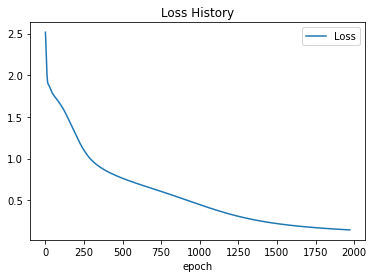

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

So there you go, you can write a simple machine learning code in just 30 minutes using Python and Google Colab.